<a href="https://colab.research.google.com/github/kanjamwingirwa/Olist/blob/kanja/Olist_Analysis_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
warnings. filterwarnings("ignore")

Read and Preview your Datasets

In [255]:
#Let us begin by loading the datasets
category_translation_df = pd.read_csv('/content/olist_products_dataset.csv')
category_translation_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [256]:
customer_df = pd.read_csv('/content/olist_customers_dataset.csv')
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [257]:
geolocation_df = pd.read_csv('/content/olist_geolocation_dataset.csv')
geolocation_df.head(15)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [258]:
order_items_df = pd.read_csv('/content/olist_order_items_dataset.csv')
order_items_df.tail(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [259]:
payments_df = pd.read_csv('/content/olist_order_payments_dataset.csv')
payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [260]:
reviews_df = pd.read_csv('/content/olist_order_reviews_dataset.csv')
reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [261]:
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [262]:
products_df = pd. read_csv('/content/olist_products_dataset.csv')
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [263]:
sellers_df = pd.read_csv('/content/olist_sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [264]:
product_translation_df = pd.read_excel('/content/product_category_name_translation.xlsx')
product_translation_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Let us do some data cleaning
Let's begin by correcting spelling mistakes

In [265]:
dict = {'product_name_lenght': 'product_name_length',
        'product_description_lenght': 'product_description_length'}

In [266]:
category_translation_df.rename(columns=dict,
          inplace=True)                               

In [267]:
category_translation_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [268]:
#lets go to the products table
dict = {'product_name_lenght': 'product_name_length',
        'product_description_lenght': 'product_description_length'}


In [269]:
#products_df
products_df.rename(columns=dict,
          inplace=True)  

In [270]:
products_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# Understanding the Data 

In [271]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [272]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [273]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [274]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [275]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [276]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [277]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [278]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [279]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [280]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


# Data Cleaning

There are some null values that we have to deal with 

Let's drop the reviews comments and title as we may not need them

In [281]:
reviews_df = reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

Let's remove the null values  in the category_translation table

In [282]:
category_translation_df = category_translation_df.dropna()

In [283]:
category_translation_df = category_translation_df.reset_index(drop = True)

In [284]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_length         32340 non-null  float64
 3   product_description_length  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


Let's remove the null values  in the orders table

In [285]:
orders_df = orders_df.dropna()

In [286]:
orders_df = orders_df.reset_index(drop=True)

In [287]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 5.9+ MB


Let's remove the null values  in the products table

In [288]:
products_df = products_df.dropna()

In [289]:
products_df = products_df.reset_index(drop=True)

In [290]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_length         32340 non-null  float64
 3   product_description_length  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


In [291]:
datasets = [customer_df, geolocation_df, order_items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [data.duplicated().sum() for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_creation_date, review_answer_timestamp",100000,5,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",96461,8,0,0,
6,products,"product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,


As we can see above, there are no more null values. We also have some duplicate values but this is to be expected since many people can buy the same product.


# Exploratory Data Analysis (EDA)

In [292]:
import plotly.express as px

In [293]:
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = payments_df[x].value_counts().index, y = payments_df[x].value_counts(), color = payments_df[x].value_counts().index, height = 600)
  fig.show()

In [294]:
barplot_visualization("payment_type")

Most people pay by credit cards

In [295]:
series = reviews_df['review_score'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['review_score', 'Total']

print(df_result)

   review_score  Total
0             5  57420
1             4  19200
2             1  11858
3             3   8287
4             2   3235


In [296]:
fig = px.pie(df_result,
             values='Total',
             names='review_score')

fig.show()

More than half the customers gave a '5' review score

In [297]:
series = orders_df['order_status'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['order_status', 'Total']

In [298]:

print(df_result)

  order_status  Total
0    delivered  96455
1     canceled      6


In [299]:
fig = px.pie(df_result,
             values='Total',
             names='order_status')

fig.show()

Almost all orders were delivered. A negligible number were cancelled 

In [300]:
series = sellers_df['seller_state'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['seller', 'Total']
print(df_result)

   seller  Total
0      SP   1849
1      PR    349
2      MG    244
3      SC    190
4      RJ    171
5      RS    129
6      GO     40
7      DF     30
8      ES     23
9      BA     19
10     CE     13
11     PE      9
12     PB      6
13     RN      5
14     MS      5
15     MT      4
16     RO      2
17     SE      2
18     PI      1
19     AC      1
20     MA      1
21     AM      1
22     PA      1


<Axes: >

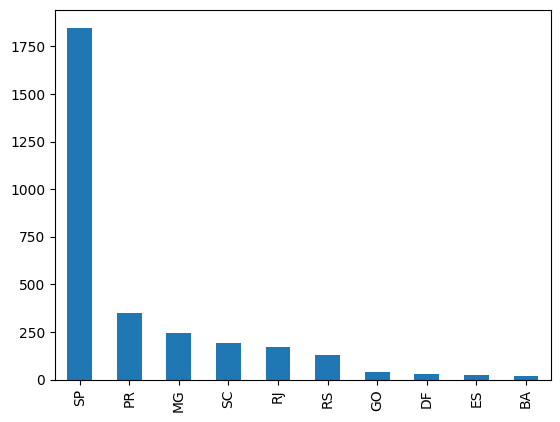

In [301]:
#find values with top 10 occurrences in 'seller_state'
top_10 = (sellers_df['seller_state'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar')

Sao Paolo is the the state where most sellers are located.

<Axes: >

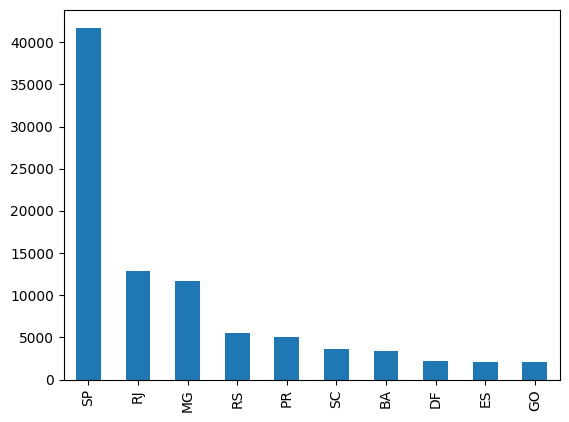

In [302]:
#find values with top 10 occurrences in 'seller_state'
top_10 = (customer_df['customer_state'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar')

Sao Paolo is where most customers are located.

Let's answer some business Questions
1.What is the total revenue generated by Olist, and how has it changed over time?

In [303]:
#to get toal revenue we shall use the payments df
total_payments = payments_df['payment_value'].sum()
print(total_payments)

16008872.12


The total revenue stands at about $16,008,872.12

In [304]:
#to see how revenues change over time we need to merge payments_df with orders_df
combined_df = pd.merge(payments_df,orders_df,on='order_id')
combined_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


In [305]:
# Convert the date column to a datetime object
combined_df['Date'] = pd.to_datetime(combined_df['order_delivered_customer_date'])
#combined_df['Year'] = combined_df['order_delivered_customer_date'].dt.year
#combined_df['Month'] = combined_df['order_delivered_customer_date'].dt.month
#combined_df['Day']  = combined_df['order_delivered_customer_date'].dt.day

In [306]:
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.month
#combined_df['Day']  = combined_df['Date'].dt.day_

In [307]:
combined_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Date,Year,Month
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,2018-05-09 17:36:51,2018,5
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,2018-06-29 20:32:09,2018,6
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,2017-12-18 17:24:41,2017,12
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,2017-12-21 01:35:51,2017,12
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,2018-06-01 21:44:53,2018,6


In [308]:
years = [unique for unique in combined_df.Year.unique()]
years

[2018, 2017, 2016]

This data runs over a period of three years,

In [309]:
def plot_trend(years:list, combined_df):
    for year in years:
        new_df = combined_df[combined_df['Year'] == year]
        new_df.groupby('Date')['payment_value'].sum().plot(linewidth=1.2, 
                                             ylabel='Revenue', 
                                             xlabel='Date', 
                                             title='Sales Trend');

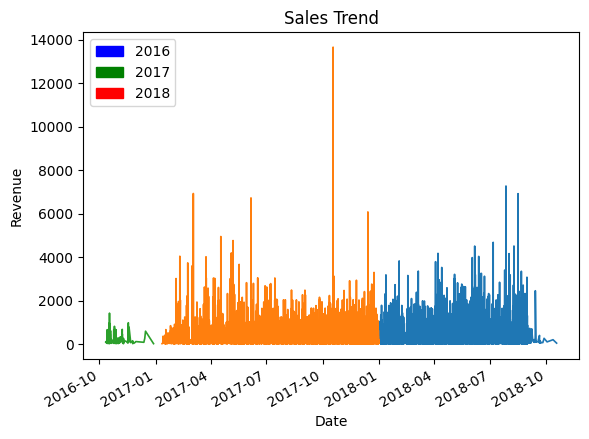

In [310]:
import matplotlib.patches as patches

year1 = patches.Patch(color='blue', label='2016')
year2 = patches.Patch(color='green', label='2017')
year3 = patches.Patch(color='red', label='2018')
plot_trend(years, combined_df)
plt.legend(handles=[year1,year2,year3], loc=2);

There was a spike in sales in October 2017

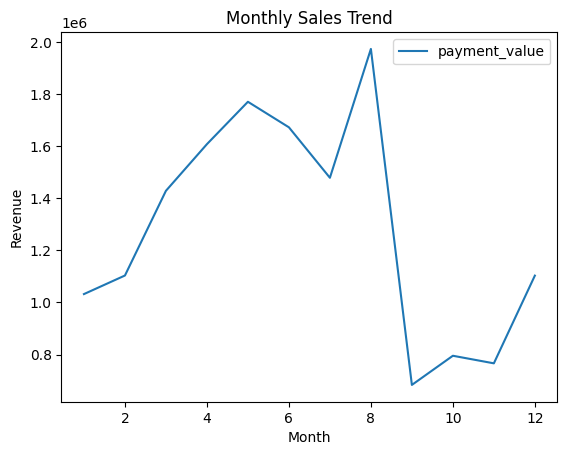

In [311]:
ax = combined_df[['Month', 'payment_value']].groupby('Month').sum().plot(
                                                                 title='Monthly Sales Trend', 
                                                                 ylabel='Revenue',
                                                                 );


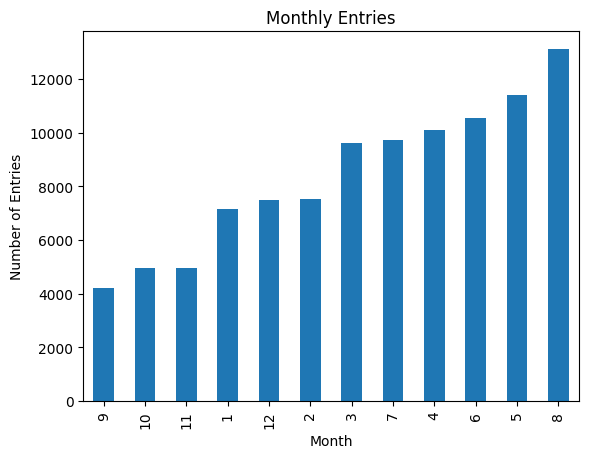

In [312]:
combined_df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Monthly Entries');

August is the month where most sales were made

In [313]:
changes = pd.DataFrame(combined_df.groupby([combined_df.Date.dt.year])['payment_value'].sum())
changes

,payment_value
Date,
2016,47290.82
2017,6508670.42
2018,8863721.61


There seems to be a perpetual increase in revenue over the years

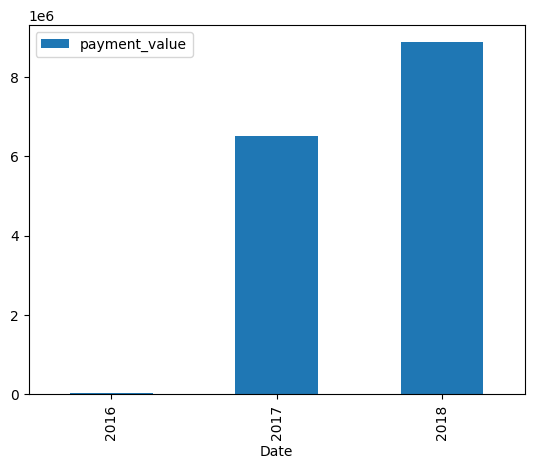

In [314]:
changes.sort_values('Date').plot(kind='bar');

In [315]:
Months_of_the_Year = combined_df[['Month','Year','payment_value']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['payment_value'].sum())
Months_of_the_Year.sort_values(by=['Year','payment_value'], ascending=False)

payment_value
Year Month               
2018 8         1347216.73
     4         1300791.67
     6         1171086.67
     5         1170501.14
     3         1043798.70
     1          993588.74
     7          948000.64
     2          875514.19
     9           12875.18
     10            347.95
2017 12        1102232.62
     10         759903.98
     11         754668.98
     9          670205.77
     8          627367.19
     5          600917.76
     7          531271.71
     6          502197.97
     3          385435.65
     4          307722.84
     2          228091.83
     1           38654.12
2016 10          34953.78
     11          11376.19
     12            960.85

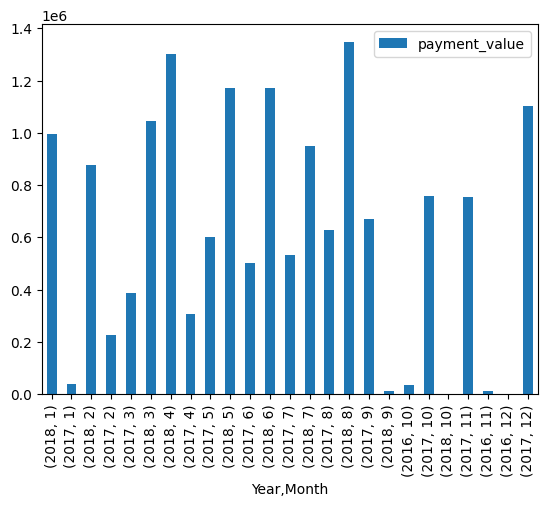

In [316]:
Months_of_the_Year.sort_values('Month',).plot(kind='bar');

September 2017 is the month most sales were made
There was a sudden spike in September 2018 and this should be investigated

Question 2:How many orders were placed on Olist, and how does this vary by month or season? To answer this question, we only focus on the orders dataset.

We will remove the four columns that have a lot of null values and assume that once the order is purchased, it is indeed delivered and not returned.

In [317]:
#dropping the four columns
orders_df = orders_df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)

In [318]:
#let's preview the dataset now
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [319]:
#lets first remove any duplicates
orders_df = orders_df.drop_duplicates()

In [320]:
#to get total revenue we shall use the payments df
total_orders = orders_df['order_id'].count()
print(total_orders)

96461


There were 96,461 unique orders placed/ 

In [321]:
# Convert the date column to a datetime object
orders_df['Date'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
#combined_df['Year'] = combined_df['order_delivered_customer_date'].dt.year
#combined_df['Month'] = combined_df['order_delivered_customer_date'].dt.month
#combined_df['Day']  = combined_df['order_delivered_customer_date'].dt.day

In [322]:
#preview the dataset
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,Date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 21:18:39


In [323]:
orders_df['Year'] = orders_df['Date'].dt.year
orders_df['Month'] = orders_df['Date'].dt.month
orders_df['Day']  = orders_df['Date'].dt.day

In [324]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,Date,Year,Month,Day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 10:56:33,2017,10,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24 20:41:37,2018,7,24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:38:49,2018,8,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:28:06,2017,11,18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 21:18:39,2018,2,13


In [325]:
orders_df['Day']  = orders_df['Date'].dt.day_name()
#orders_df['Date'].dt.day_name()

In [326]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,Date,Year,Month,Day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 10:56:33,2017,10,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24 20:41:37,2018,7,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:38:49,2018,8,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:28:06,2017,11,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 21:18:39,2018,2,Tuesday


In [327]:
def plot_trend(years:list, combined_df):
    for year in years:
        new_df = orders_df[orders_df['Year'] == year]
        new_df.groupby('Date')['order_id'].count().plot(linewidth=1.2, 
                                             ylabel='Revenue', 
                                             xlabel='Date', 
                                             title='Trend of Orders');

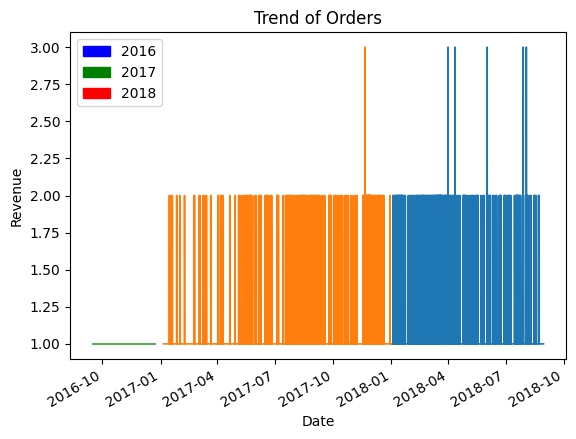

In [328]:

import matplotlib.patches as patches

year1 = patches.Patch(color='blue', label='2016')
year2 = patches.Patch(color='green', label='2017')
year3 = patches.Patch(color='red', label='2018')
plot_trend(years, combined_df)
plt.legend(handles=[year1,year2,year3], loc=2);

The spikes seem to be quite similar to the sales

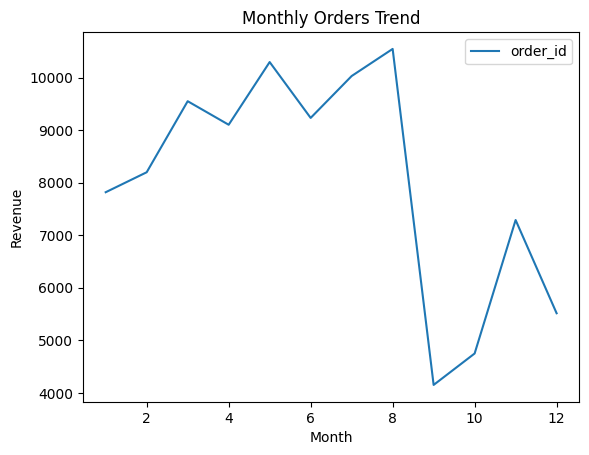

In [329]:

ax = orders_df[['Month', 'order_id']].groupby('Month').count().plot(
                                                                 title='Monthly Orders Trend', 
                                                                 ylabel='Revenue',
                                                                 );


The general trend seems to be the same but with some differences

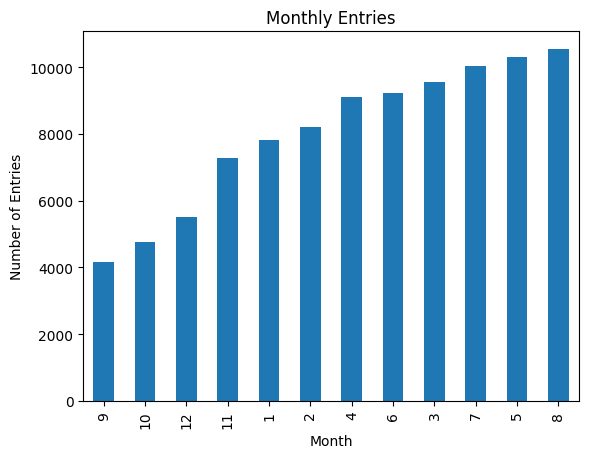

In [330]:
orders_df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Monthly Entries');

While the min and max month remain the same to sales, some months in March have a significant difference. Perhaps many low order values were made in March  

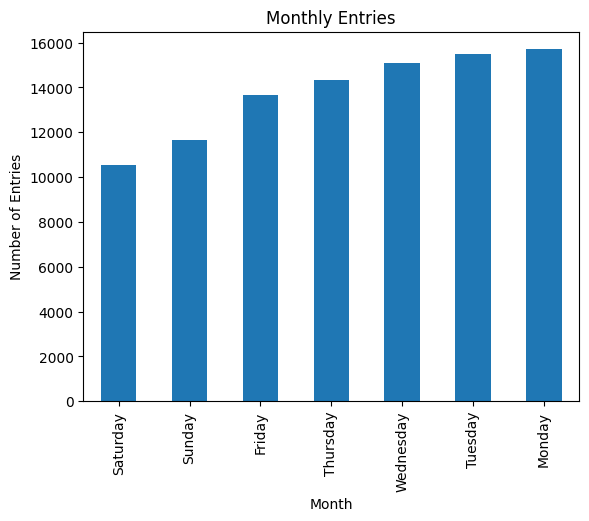

In [331]:
orders_df['Day'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Monthly Entries');

It is interesting to note that the least orders were done over the weekend. 

In [332]:
changes = pd.DataFrame(orders_df.groupby([orders_df.Date.dt.year])['order_id'].count())
changes

,order_id
Date,
2016,272
2017,43411
2018,52778


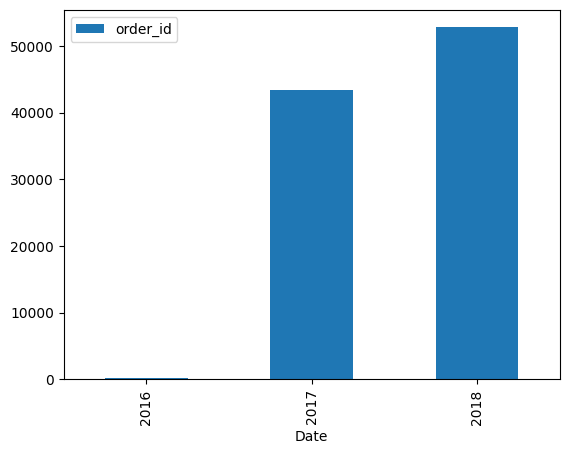

In [333]:
changes.sort_values('Date').plot(kind='bar');

There has been an increase of orders over the years.

In [334]:

Months_of_the_Year = orders_df[['Month','Year','order_id']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Year','Month'])['order_id'].count())
Months_of_the_Year.sort_values(by=['Year','order_id'], ascending=False)

order_id
Year Month          
2018 1          7069
     3          7003
     4          6798
     5          6749
     2          6556
     8          6351
     7          6156
     6          6096
2017 11         7288
     12         5513
     10         4478
     8          4193
     9          4149
     7          3872
     5          3545
     6          3135
     3          2546
     4          2303
     2          1641
     1           748
2016 10          270
     9             1
     12            1

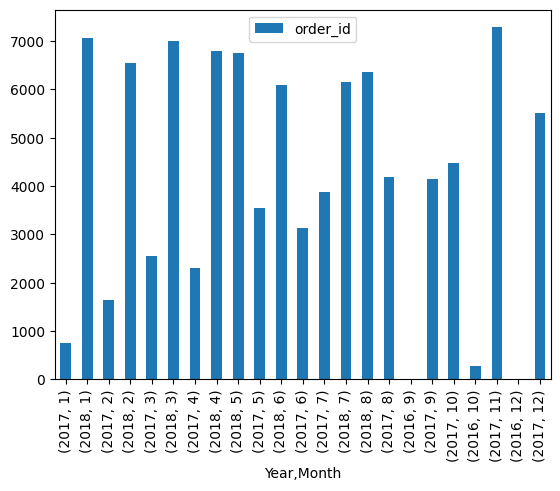

In [335]:
Months_of_the_Year.sort_values('Month',).plot(kind='bar');

November 2017 was the month when most orders were made

Question Three: What are the most popular product categories on Olist, and how do their sales volumes
compare to each other?
To achieve this we will merge the order_items_df with products_df in order to cateogirze various orders in their categories

In [336]:
#let's first drop duplicates from orders_df
orders_df = orders_df.drop_duplicates()

In [337]:
#to merger order_items_df with payements_df
popular_df = pd.merge(products_df,order_items_df,on='product_id')
popular_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [338]:
popular_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 111045
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  111046 non-null  object 
 1   product_category_name       111046 non-null  object 
 2   product_name_length         111046 non-null  float64
 3   product_description_length  111046 non-null  float64
 4   product_photos_qty          111046 non-null  float64
 5   product_weight_g            111046 non-null  float64
 6   product_length_cm           111046 non-null  float64
 7   product_height_cm           111046 non-null  float64
 8   product_width_cm            111046 non-null  float64
 9   order_id                    111046 non-null  object 
 10  order_item_id               111046 non-null  int64  
 11  seller_id                   111046 non-null  object 
 12  shipping_limit_date         111046 non-null  object 
 13  price         

No null observations.

In [339]:
total_products = popular_df['product_id'].nunique()
print(total_products)

32340


In [340]:
total_products_categories = popular_df['product_category_name'].nunique()
print(total_products_categories)


73


There were 32340 unique products sold and they all fall in 73 categories

In [341]:
popular_df.groupby(['order_id', 'product_category_name']).size().groupby('product_category_name').max().iloc[:10]
#df.groupby(['col5','col2']).size().reset_index().groupby('col2')  .max()
#df.groupby(['col5', 'col2']).size().

product_category_name
agro_industria_e_comercio     6
alimentos                     6
alimentos_bebidas             5
artes                         6
artes_e_artesanato            2
artigos_de_festas             2
artigos_de_natal              6
audio                         3
automotivo                   20
bebes                        12
dtype: int64

In [342]:
top_10 = (popular_df['product_category_name'].value_counts()).iloc[:10]
print(top_10)

cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_category_name, dtype: int64


This is not in English so we merge the popular_df with product_category_translation_df

In [343]:
#to merger order_items_df with payements_df
popular_df = pd.merge(popular_df,product_translation_df,on='product_category_name')
popular_df.head(5)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,perfumery


In [344]:
top_10 = (popular_df['product_category_name_english'].value_counts()).iloc[:10]
print(top_10)

bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_category_name_english, dtype: int64


<Axes: >

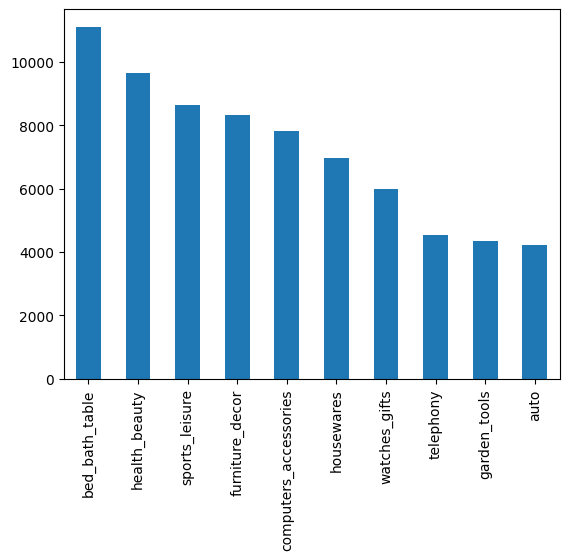

In [345]:
#create bar chart to visualize top 10 values
top_10.plot(kind='bar')

Bed bath table is the most popular product category

<Axes: xlabel='product_category_name_english'>

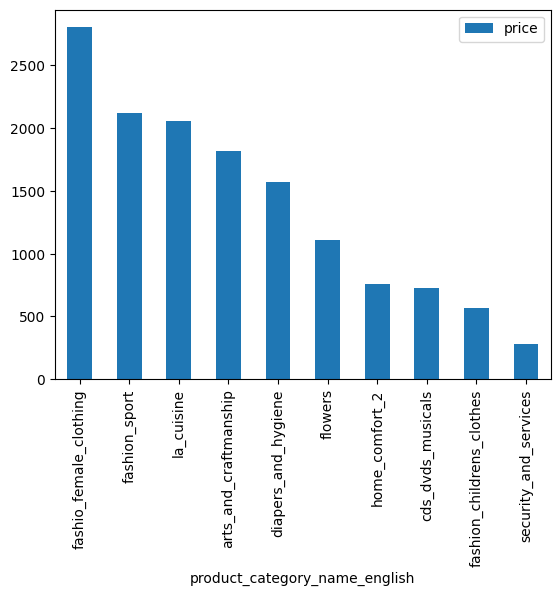

In [363]:
bottom_10_sales.plot(kind='bar')


In [346]:
bottom_10 = (popular_df['product_category_name_english'].value_counts()).iloc[-10:]
print(bottom_10)

music                                38
furniture_mattress_and_upholstery    38
flowers                              33
fashion_sport                        30
home_comfort_2                       30
arts_and_craftmanship                24
la_cuisine                           14
cds_dvds_musicals                    14
fashion_childrens_clothes             8
security_and_services                 2
Name: product_category_name_english, dtype: int64


In [347]:
top_10_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.sum,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_sales)

                                    price
product_category_name_english            
health_beauty                  1258681.34
watches_gifts                  1205005.68
bed_bath_table                 1036988.68
sports_leisure                  988048.97
computers_accessories           911954.32
furniture_decor                 729762.49
cool_stuff                      635290.85
housewares                      632248.66
auto                            592720.11
garden_tools                    485256.46


In [348]:
bottom_10_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.sum,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_sales)

                                 price
product_category_name_english         
fashio_female_clothing         2803.64
fashion_sport                  2119.51
la_cuisine                     2054.99
arts_and_craftmanship          1814.01
diapers_and_hygiene            1567.59
flowers                        1110.04
home_comfort_2                  760.27
cds_dvds_musicals               730.00
fashion_childrens_clothes       569.85
security_and_services           283.29


<Axes: xlabel='product_category_name_english'>

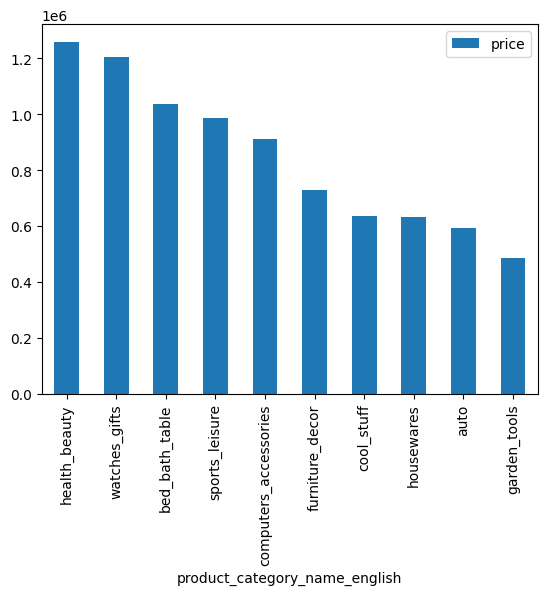

In [349]:
#create bar chart to visualize top 10 values
top_10_sales.plot(kind='bar')

While bed_bath_table are the most sold in terms of sheer numbers, they are not the ones selling most in terms of sales. 
However, most of the items in top 10 for both sales and number remain generally the same

Question Four: What is the average order value (AOV) on Olist, and how does this vary by product category
or payment method?


In [350]:
Average_Order_Value = popular_df["price"].mean()
print(Average_Order_Value)

120.73877195510799


The average order value for an order on Olist is $120.74

In [351]:
#mean = popular_df.loc[popular_df['price'          , 'product_category_name_english']].mean()
#print(mean)
mean_by_category = popular_df.groupby(['product_category_name_english'])['price'].mean()
print(mean_by_category)

product_category_name_english
agro_industry_and_commerce    342.124858
air_conditioning              185.269226
art                           115.802105
arts_and_craftmanship          75.583750
audio                         139.254121
                                 ...    
stationery                     91.753369
tablets_printing_image         90.703735
telephony                      71.213978
toys                          117.548360
watches_gifts                 201.135984
Name: price, Length: 71, dtype: float64


In [352]:
top_10_aov_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_aov_sales)

                                             price
product_category_name_english                     
computers                              1098.340542
small_appliances_home_oven_and_coffee   624.285658
home_appliances_2                       476.124958
agro_industry_and_commerce              342.124858
musical_instruments                     281.616000
small_appliances                        280.778468
fixed_telephony                         225.693182
construction_tools_safety               208.992371
watches_gifts                           201.135984
air_conditioning                        185.269226


In [353]:
bottom_10_aov_sales = pd.pivot_table(
   popular_df,
   index=['product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_aov_sales)

                                   price
product_category_name_english           
drinks                         59.178628
fashio_female_clothing         58.409167
electronics                    57.913531
food                           57.634137
christmas_supplies             57.521699
food_drink                     54.602446
cds_dvds_musicals              52.142857
diapers_and_hygiene            40.194615
flowers                        33.637576
home_comfort_2                 25.342333


Things that are expensive don't sell out as much. 

In [354]:
#lets drop a few columns from popular_df

new_df = popular_df.drop(['product_name_length',	'product_description_length',	'product_photos_qty',	'product_weight_g',	'product_length_cm',	'product_height_cm', 'product_width_cm'	], axis=1)
new_df.head(5)

,product_id,product_category_name,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,perfumery


In [355]:
new_df = new_df.drop(['seller_id',	'order_item_id',	'shipping_limit_date',	'freight_value'], axis=1)
new_df.head(5)

,product_id,product_category_name,order_id,price,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,048cc42e03ca8d43c729adf6962cb348,16.90,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,5fa78e91b5cb84b6a8ccc42733f95742,16.90,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,339.00,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,7b13c77c64a9a956500cbf1a9a23798d,275.00,perfumery


In [356]:
#lets merge the new_df with payment_df
newest_df = pd.merge(payments_df,new_df,on='order_id')
newest_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category_name,price,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,79.80,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,a630cc320a8c872f9de830cf121661a3,automotivo,17.00,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,2028bf1b01cafb2d2b1901fca4083222,perfumaria,56.99,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,89.90,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,386486367c1f9d4f587a8864ccb6902b,cama_mesa_banho,113.57,bed_bath_table


In [357]:
top_10_payment_type_average_sales = pd.pivot_table(
   newest_df,
   index=['payment_type'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_payment_type_average_sales)

                   price
payment_type            
credit_card   126.611902
debit_card    108.906526
voucher       104.905878
boleto        104.525530


Credit vard was the highest when it comes to average sales

In [358]:
top_10_payment_type_average_sales_per_category = pd.pivot_table(
   newest_df,
   index=['payment_type', 'product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[:10]
print(top_10_payment_type_average_sales_per_category)

                                                          price
payment_type product_category_name_english                     
voucher      computers                              1180.956667
credit_card  computers                              1116.238391
boleto       computers                              1012.195588
voucher      small_appliances_home_oven_and_coffee   750.000000
credit_card  small_appliances_home_oven_and_coffee   648.429231
             home_appliances_2                       557.288703
boleto       small_appliances_home_oven_and_coffee   502.232222
debit_card   fixed_telephony                         421.076667
credit_card  agro_industry_and_commerce              350.122690
voucher      musical_instruments                     346.203400


The average sales brought in by computers for the customers who paid by voucher were the highest

In [359]:
bottom_10_payment_type_average_sales_per_category = pd.pivot_table(
   newest_df,
   index=['payment_type', 'product_category_name_english'],
   aggfunc={'price': np.mean,}
).sort_values(['price'],  ascending=[False]).iloc[-10:]
print(bottom_10_payment_type_average_sales_per_category)

                                                        price
payment_type product_category_name_english                   
debit_card   construction_tools_safety              33.900000
credit_card  flowers                                33.295000
voucher      books_technical                        29.616667
boleto       dvds_blu_ray                           28.985333
debit_card   small_appliances_home_oven_and_coffee  27.720000
boleto       la_cuisine                             24.000000
credit_card  home_comfort_2                         19.164783
voucher      cine_photo                             13.900000
             christmas_supplies                     13.010000
             home_comfort_2                         12.900000


Question 5:How many sellers are active on Olist, and how does this number change over time

In [360]:
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [398]:
#to find total number of sellers on Olist
total_sellers = seller_df['seller_id'].nunique()
print(total_sellers)

3095


In [ ]:
total_sellers = seller_df['seller_id','Year'].nunique()
print(total_sellers)

There were 3095 sellers found on Olist

In [367]:

series = sellers_df['seller_state'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['seller', 'Total']
print(df_result)

   seller  Total
0      SP   1849
1      PR    349
2      MG    244
3      SC    190
4      RJ    171
5      RS    129
6      GO     40
7      DF     30
8      ES     23
9      BA     19
10     CE     13
11     PE      9
12     PB      6
13     RN      5
14     MS      5
15     MT      4
16     RO      2
17     SE      2
18     PI      1
19     AC      1
20     MA      1
21     AM      1
22     PA      1


<Axes: title={'center': 'Top ten states wrt Sellers'}>

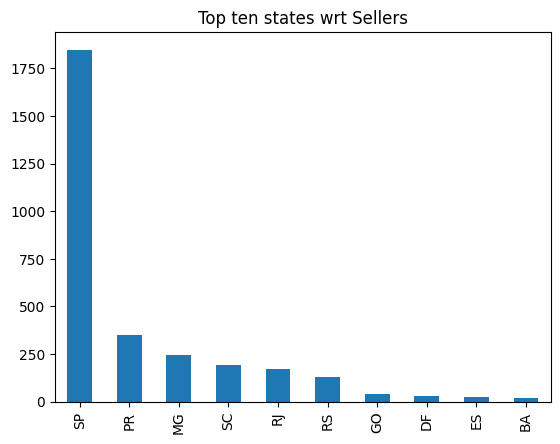

In [370]:
#find values with top 10 occurrences in 'seller_state'
top_10 = (sellers_df['seller_state'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar', title= 'Top ten states wrt Sellers')
     

In [371]:
series = sellers_df['seller_city'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['seller', 'Total']
print(df_result)

                  seller  Total
0              sao paulo    694
1               curitiba    127
2         rio de janeiro     96
3         belo horizonte     68
4         ribeirao preto     52
..                   ...    ...
606               taruma      1
607  s jose do rio preto      1
608     domingos martins      1
609      messias targino      1
610                 leme      1

[611 rows x 2 columns]


<Axes: title={'center': 'Top ten cities wrt Sellers'}>

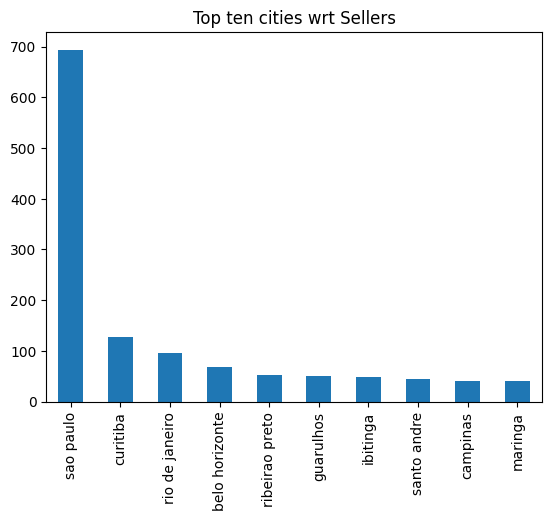

In [372]:
#find values with top 10 occurrences in 'seller_state'
top_10 = (sellers_df['seller_city'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar', title= 'Top ten cities wrt Sellers')

The city of Sao Paolo itself had the most number of sellers

In [366]:
#to see how sellers change over time we need to merge sellers_df with orders_items_df
seller_df = pd.merge(sellers_df,order_items_df,on='seller_id')
seller_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [374]:
# Convert the date column to a datetime object
seller_df['Date'] = pd.to_datetime(seller_df['shipping_limit_date'])

In [375]:
seller_df['Year'] = seller_df['Date'].dt.year
seller_df['Month'] = seller_df['Date'].dt.month

In [376]:
seller_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,Date,Year,Month
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,2017-08-25 20:50:19,2017,8
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,2017-05-11 16:25:11,2017,5
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,2017-09-05 12:50:19,2017,9
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,2017-11-22 04:30:29,2017,11
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,2017-10-06 02:14:42,2017,10


In [390]:
years = [unique for unique in seller_df.Year.unique()]
years

[2017, 2018, 2016, 2020]

The data wrt sellers runs for 4years

In [402]:
group_by_year =seller_df.groupby('Year')['seller_id'].nunique()
print(group_by_year)

Year
2016     145
2017    1771
2018    2398
2020       1
Name: seller_id, dtype: int64


There has been a steady increase in the number of sellers over the years. A new entrant joined in 2020. This should be looked into..,is it an error or genuine?

In [386]:
def plot_trend(years:list, seller_df):
    for year in years:
        new_df = seller_df[seller_df['Year'] == year]
        new_df.groupby('Date')['price'].sum().plot(linewidth=1.2, 
                                             ylabel='Revenue', 
                                             xlabel='Date', 
                                             title='Seller Trend');
     

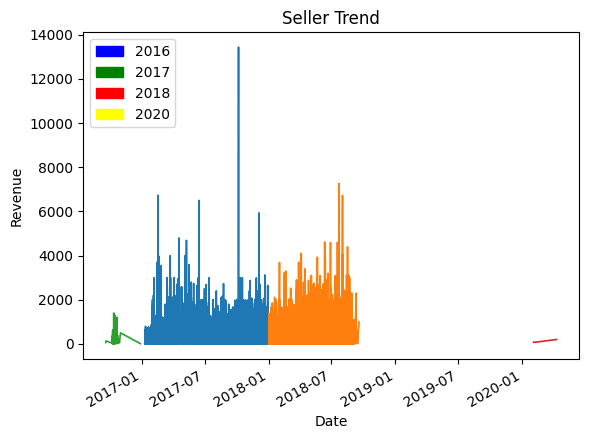

In [391]:
import matplotlib.patches as patches

year1 = patches.Patch(color='blue', label='2016')
year2 = patches.Patch(color='green', label='2017')
year3 = patches.Patch(color='red', label='2018')
year4 = patches.Patch(color='yellow', label = '2020')
plot_trend(years, seller_df)
plt.legend(handles=[year1,year2,year3,year4], loc=2);


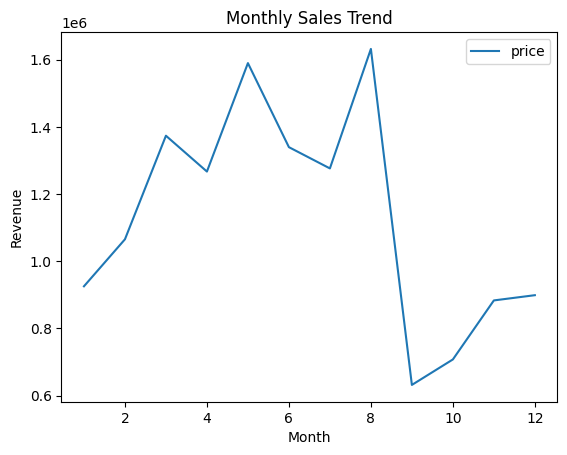

In [393]:

ax = seller_df[['Month', 'price']].groupby('Month').sum().plot(
                                                                 title='Monthly Sales Trend', 
                                                                 ylabel='Revenue',
                                                                 );


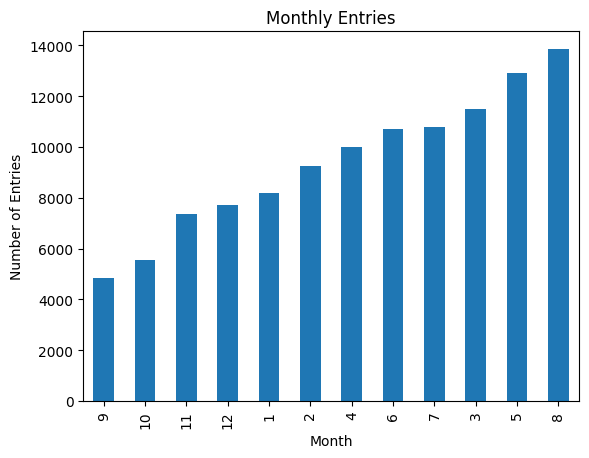

In [394]:
seller_df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Monthly Entries');
     

In [397]:
changes = pd.DataFrame(seller_df.groupby([combined_df.Date.dt.year])['price'].sum())
changes

,price
Date,
2016.0,32634.15
2017.0,5170582.01
2018.0,6869905.46


There was a steady increase in the amount of revenue pocketed by the sellers over the years

Question 6: What is the distribution of seller ratings on Olist, and how does this impact sales
performance?


In [405]:
reviews_df.head(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [403]:
#to see distribution of ratings on Olist
series = reviews_df['review_score'].value_counts()

df_result = pd.DataFrame(series)

df_result = df_result.reset_index()  

df_result.columns = ['review_score', 'Total']

print(df_result)

   review_score  Total
0             5  57420
1             4  19200
2             1  11858
3             3   8287
4             2   3235


In [404]:
#representation in a pie chart
fig = px.pie(df_result,
             values='Total',
             names='review_score')

fig.show()
     

More than half gave positive reviews

In [413]:
seller_df.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,Date,Year,Month
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56,2017-08-25 20:50:19,2017,8
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92,2017-05-11 16:25:11,2017,5
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42,2017-09-05 12:50:19,2017,9


In [418]:
score_df = pd.merge(seller_df,reviews_df,on='order_id')
score_df.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,Date,Year,Month,review_id,review_score,review_creation_date,review_answer_timestamp
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56,2017-08-25 20:50:19,2017,8,88980a9c50a6909fa1fe35ddab8fa1e2,5,2017-08-31 00:00:00,2017-08-31 21:37:39
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92,2017-05-11 16:25:11,2017,5,b9b791819c5c1a5c6a4ffc7881f97fb5,1,2017-06-01 00:00:00,2017-06-01 12:57:10
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42,2017-09-05 12:50:19,2017,9,cc77a6d63753c1d7b88b7c64630b97b9,3,2017-09-02 00:00:00,2017-09-03 17:31:14


In [421]:
#lets drop some columns
#reviews_df = reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)
score_df=score_df.drop(['seller_zip_code_prefix','order_item_id','shipping_limit_date','Date','Month', 'review_id', 'review_creation_date', 'review_answer_timestamp'], axis=1)
score_df.head(5)

,seller_id,seller_city,seller_state,order_id,product_id,price,freight_value,Year,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,2017,5
1,3442f8959a84dea7ee197c632cb2df15,campinas,SP,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,2017,1
2,3442f8959a84dea7ee197c632cb2df15,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,2017,3
3,8c16d1f32a54d92897cc437244442e1b,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1b37d55343061aa2b18b807945ff9831,118.90,26.68,2017,3
4,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,2017,5


In [422]:

score_df = pd.merge(score_df,category_translation_df,on='product_id')
score_df.head(3)

,seller_id,seller_city,seller_state,order_id,product_id,price,freight_value,Year,review_score,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,106.2,9.56,2017,5,esporte_lazer,26.0,417.0,3.0,700.0,43.0,15.0,35.0
1,3442f8959a84dea7ee197c632cb2df15,campinas,SP,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,101.7,15.92,2017,1,esporte_lazer,27.0,485.0,2.0,600.0,35.0,15.0,28.0
2,3442f8959a84dea7ee197c632cb2df15,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,10.8,2.42,2017,3,esporte_lazer,44.0,1089.0,1.0,300.0,16.0,5.0,15.0


In [425]:
#lets drop some columns
score_df=score_df.drop(['product_weight_g'], axis=1)
score_df.head(5)

,seller_id,seller_city,seller_state,order_id,product_id,price,freight_value,Year,review_score,product_category_name
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,106.2,9.56,2017,5,esporte_lazer
1,3442f8959a84dea7ee197c632cb2df15,campinas,SP,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,101.7,15.92,2017,1,esporte_lazer
2,3442f8959a84dea7ee197c632cb2df15,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,10.8,2.42,2017,3,esporte_lazer
3,8c16d1f32a54d92897cc437244442e1b,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1b37d55343061aa2b18b807945ff9831,118.9,26.68,2017,3,moveis_escritorio
4,8c16d1f32a54d92897cc437244442e1b,blumenau,SC,1c3a07f6d5470538c2bbed1275e785b3,1b37d55343061aa2b18b807945ff9831,118.9,53.19,2017,1,moveis_escritorio


In [433]:
#score_df = pd.merge(score_df,category_translation_df,on='product_id')
score_df = pd.merge(product_translation_df,score_df, on='product_category_name')
score_df.head(5)

,product_category_name,product_category_name_english,seller_id,seller_city,seller_state,order_id,product_id,price,freight_value,Year,review_score,product_category_name_english_x,product_category_name_english_y
0,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,00d9ac423c9ad6781c0ed04e87666691,6cdd53843498f92890544667809f1595,349.9,29.30,2017,5,health_beauty,health_beauty
1,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,0301ec492e902f2630234df285fa2a1b,6cdd53843498f92890544667809f1595,349.9,29.30,2017,4,health_beauty,health_beauty
2,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,05426618bfbb87e04fdd3a60a5bfef38,6cdd53843498f92890544667809f1595,364.0,21.74,2018,5,health_beauty,health_beauty
3,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,062668b0f8fe98dbe6d23ab391e22c81,6cdd53843498f92890544667809f1595,349.9,19.70,2018,4,health_beauty,health_beauty
4,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,064c48df7cb281b1f0f0cfcaa2a69662,6cdd53843498f92890544667809f1595,349.9,29.30,2017,5,health_beauty,health_beauty


In [434]:
score_df=score_df.drop(['product_category_name_english_x', 'product_category_name_english_y'], axis=1)
score_df.head(3)

,product_category_name,product_category_name_english,seller_id,seller_city,seller_state,order_id,product_id,price,freight_value,Year,review_score
0,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,00d9ac423c9ad6781c0ed04e87666691,6cdd53843498f92890544667809f1595,349.9,29.30,2017,5
1,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,0301ec492e902f2630234df285fa2a1b,6cdd53843498f92890544667809f1595,349.9,29.30,2017,4
2,beleza_saude,health_beauty,ccc4bbb5f32a6ab2b7066a4130f114e3,curitiba,PR,05426618bfbb87e04fdd3a60a5bfef38,6cdd53843498f92890544667809f1595,364.0,21.74,2018,5


In [456]:
ratings_per_category =score_df[['product_category_name_english', 'review_score']].groupby('product_category_name_english').mean().iloc[-10:]
ratings_per_category.sort_values(by=['review_score'], ascending=False)

,review_score
product_category_name_english,
small_appliances_home_oven_and_coffee,4.302632
stationery,4.181386
toys,4.138667
small_appliances,4.124451
sports_leisure,4.093323
signaling_and_security,4.070352
tablets_printing_image,4.048193
watches_gifts,4.002000
telephony,3.935604


Security and Servuces have the poorest average score. 

 How many customers have made repeat purchases on Olist, and what percentage of total sales do they account for?

In [469]:
orders2_df = pd.read_csv('/content/olist2.csv')
orders2_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [471]:
orders2_df = orders2_df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date'], axis=1)  
orders2_df.head(5)

#reviews_df = reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [472]:
print(orders2_df.isnull().values.sum())

0


In [474]:
orders2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [476]:
orders2_df['Date'] = pd.to_datetime(orders2_df['order_purchase_timestamp'])


In [477]:
orders2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  object        
 4   Date                      99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ MB


In [480]:
orders2_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,Date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 21:18:39


In [482]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, x.day, 1) 
# Create transaction_date column based on month and store in TransactionMonth
orders2_df['TransactionMonth'] = orders2_df['Date'].apply(get_month) 
# Grouping by customer_id and select the InvoiceMonth value
grouping = orders2_df.groupby('customer_id')['TransactionMonth'] 
# Assigning a minimum InvoiceMonth value to the dataset
orders2_df['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
orders2_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,Date,TransactionMonth,CohortMonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 01:00:00,2017-10-02 01:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07-24 01:00:00,2018-07-24 01:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08-08 01:00:00,2018-08-08 01:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11-18 01:00:00,2017-11-18 01:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 21:18:39,2018-02-13 01:00:00,2018-02-13 01:00:00


In [483]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(orders2_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(orders2_df, 'CohortMonth')

In [485]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
orders2_df['CohortIndex'] = years_diff * 12 + months_diff  + 1 
orders2_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,Date,TransactionMonth,CohortMonth,CohortIndex
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 01:00:00,2017-10-02 01:00:00,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07-24 01:00:00,2018-07-24 01:00:00,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08-08 01:00:00,2018-08-08 01:00:00,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11-18 01:00:00,2017-11-18 01:00:00,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 21:18:39,2018-02-13 01:00:00,2018-02-13 01:00:00,1


In [490]:
# Counting daily active user from each chort
grouping = orders2_df.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')
# Printing top 5 rows of Dataframe
cohort_data.tail(10)

,CohortMonth,CohortIndex,customer_id
624,2018-09-13 01:00:00,1,1
625,2018-09-17 01:00:00,1,1
626,2018-09-20 01:00:00,1,1
627,2018-09-25 01:00:00,1,1
628,2018-09-26 01:00:00,1,1
629,2018-09-29 01:00:00,1,1
630,2018-10-01 01:00:00,1,1
631,2018-10-03 01:00:00,1,1
632,2018-10-16 01:00:00,1,1
633,2018-10-17 01:00:00,1,1


In [488]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1
CohortMonth,
2016-09-04 01:00:00,100.0
2016-09-05 01:00:00,100.0
2016-09-13 01:00:00,100.0
2016-09-15 01:00:00,100.0
2016-10-02 01:00:00,100.0
...,...
2018-09-29 01:00:00,100.0
2018-10-01 01:00:00,100.0
2018-10-03 01:00:00,100.0


In [489]:
average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(average_standard_cost, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

NameError: ignored

In [5]:
#lets determine active customers
customer_df = pd.read_csv('/content/olist_customers_dataset.csv')
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
active_customers_df = pd.merge(customer_df,orders_df,on='customer_id')
active_customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [15]:
active_customers_df['Date'] = pd.to_datetime(active_customers_df['order_delivered_customer_date'])
active_customers_df['Year'] = active_customers_df['Date'].dt.year
active_customers_df['Month'] = active_customers_df['Date'].dt.month
active_customers_df['Day']  = active_customers_df['Date'].dt.day_name()

In [16]:
active_customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Date,Year,Month,Day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-25 10:35:35,2017.0,5.0,Thursday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-29 12:41:19,2018.0,1.0,Monday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-06-14 17:58:51,2018.0,6.0,Thursday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-28 16:04:25,2018.0,3.0,Wednesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-08-09 20:55:48,2018.0,8.0,Thursday


In [17]:
active_customers_df=active_customers_df.drop(['order_estimated_delivery_date','order_delivered_carrier_date','order_purchase_timestamp','order_approved_at','order_delivered_customer_date'], axis=1)
active_customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,Date,Year,Month,Day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-25 10:35:35,2017.0,5.0,Thursday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-29 12:41:19,2018.0,1.0,Monday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-06-14 17:58:51,2018.0,6.0,Thursday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-28 16:04:25,2018.0,3.0,Wednesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-08-09 20:55:48,2018.0,8.0,Thursday


In [18]:
total_customers = active_customers_df['customer_unique_id'].nunique()
print(total_customers)

96096


There are 96,096 customers in Olist

In [33]:
#df_monthly_active = active_customers_df.groupby('Month')['customer_unique_id'].nunique().reset_index()
#df_monthly_active.plot(kind='bar')
df_monthly_active = active_customers_df[['Month','Year','customer_unique_id']]
df_monthly_active = pd.DataFrame(df_monthly_active.groupby(['Year','Month'])['customer_unique_id'].nunique())
df_monthly_active.sort_values(by=['Year','Month','customer_unique_id'], ascending=True)
          

customer_unique_id
Year   Month                    
2016.0 10.0                  206
       11.0                   60
       12.0                    4
2017.0 1.0                   264
       2.0                  1328
       3.0                  2354
       4.0                  1821
       5.0                  3699
       6.0                  3171
       7.0                  3403
       8.0                  4223
       9.0                  3906
       10.0                 4438
       11.0                 4610
       12.0                 7107
2018.0 1.0                  6543
       2.0                  5763
       3.0                  6703
       4.0                  7788
       5.0                  7051
       6.0                  6776
       7.0                  5788
       8.0                  8247
       9.0                    56
       10.0                    3

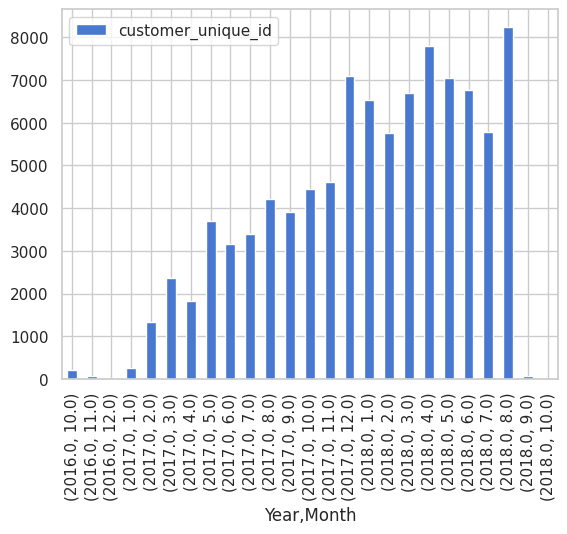

In [36]:
df_monthly_active.sort_values(by=['Year','Month','customer_unique_id'], ascending=True).plot(kind='bar');
#df_monthly_active.sort_values('Month').plot(kind='bar');